In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf


In [6]:
data=pd.read_csv( "/Users/kiwi/Downloads/Data Scientist/Edureka_Projects/ner_dataset.csv",encoding='latin1')
data=data.fillna(method='ffill')
data.head(20)


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [7]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 35178
Unique tags in corpus: 17


In [9]:
class SentenceGetter(object):
    
    def __init__(self, dataset, word_col, tag_col, sent_id_col):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [
            (w, t) for w,t in zip(s[word_col].values.tolist(), s[tag_col].values.tolist())
        ]
        self.grouped = self.dataset.groupby(sent_id_col).apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [10]:
getter = SentenceGetter(dataset=data, word_col='Word', tag_col='Tag', sent_id_col='Sentence #')
sentences = getter.sentences
print(sentences)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
words = list(set(data["Word"].values))
words.append("ENDPAD")
num_words = len(words)
num_words

35179

In [12]:
tags = list(set(data["Tag"].values))
num_tags = len(tags)
num_tags

17

In [13]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [14]:
getter = SentenceGetter(data)
sentences = getter.sentences

Number of Sentences: 47959
Maximum sequence length: 104
Number of unique words: 35179


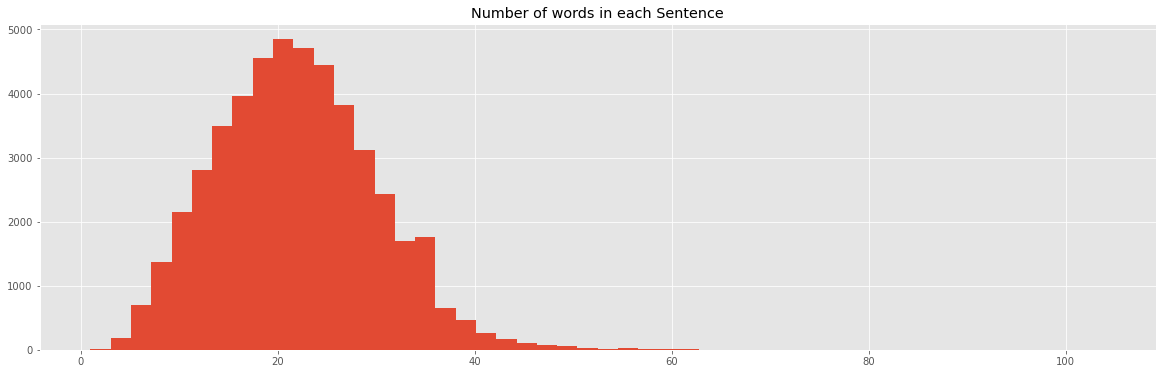

In [15]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.hist([len(s) for s in sentences], bins=50)
ax.set_title('Number of words in each Sentence')

maxlen = max([len(s) for s in sentences])
print('Number of Sentences:', len(sentences))
print ('Maximum sequence length:', maxlen)

words = list(set(data["Word"].values))
words.append("ENDPAD")
n_words = len(words)
print('Number of unique words:', n_words)

Number of unique Tags: 17


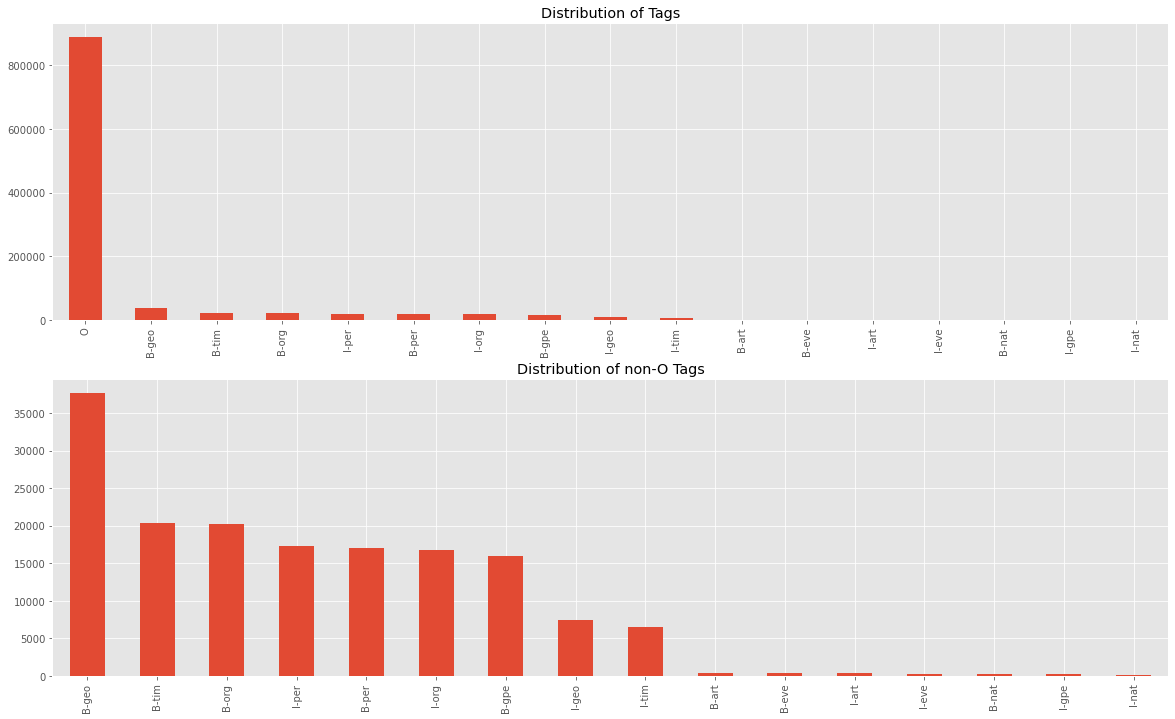

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(20, 12))
data.Tag.value_counts().plot.bar(ax=ax[0], title='Distribution of Tags')
data[data.Tag != 'O'].Tag.value_counts().plot.bar(ax=ax[1], title='Distribution of non-O Tags')

tags = list(set(data["Tag"].values))
n_tags = len(tags)
print('Number of unique Tags:', n_tags)

In [16]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [17]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [18]:
word2idx

{'experimenting': 1,
 'refine': 2,
 'terribly': 3,
 'wall': 4,
 'Wipha': 5,
 'inhabited': 6,
 'Duda': 7,
 'duffle': 8,
 'mothers': 9,
 '2,25,000': 10,
 'centrifuge': 11,
 'ties': 12,
 'Poroshenko': 13,
 'Rodier': 14,
 '46-member': 15,
 'stolen': 16,
 'redeployment': 17,
 'fourth-seed': 18,
 'N.C.': 19,
 'swing': 20,
 'drill': 21,
 'god-king': 22,
 'MOTLANTHE': 23,
 'Club': 24,
 'P.J.': 25,
 'conversions': 26,
 'Alperon': 27,
 'anti-submarine': 28,
 'entangled': 29,
 'easier': 30,
 'chapter': 31,
 'views': 32,
 'crucified': 33,
 'TWO': 34,
 'attained': 35,
 'Shan': 36,
 'Carson': 37,
 'courts': 38,
 'absorb': 39,
 'pile-up': 40,
 'paves': 41,
 'our': 42,
 'Guinean': 43,
 '1904': 44,
 'Sisli': 45,
 'Lockerbie': 46,
 'tuba': 47,
 'Performing': 48,
 'Bank': 49,
 'find': 50,
 'undetected': 51,
 'leveraged': 52,
 'shareholder': 53,
 '43,000': 54,
 'motive': 55,
 're-deployment': 56,
 'Lazcano': 57,
 'Saturday': 58,
 '57.79': 59,
 'veterinarians': 60,
 'Park': 61,
 'shellfish': 62,
 '27-year-

In [19]:
tag2idx

{'B-gpe': 0,
 'I-gpe': 1,
 'B-eve': 2,
 'I-geo': 3,
 'I-per': 4,
 'B-geo': 5,
 'I-eve': 6,
 'B-tim': 7,
 'B-per': 8,
 'B-org': 9,
 'O': 10,
 'I-nat': 11,
 'B-art': 12,
 'I-org': 13,
 'B-nat': 14,
 'I-tim': 15,
 'I-art': 16}

In [21]:
largest_sen = max(len(sen) for sen in sentences)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 104 words


In [ ]:
# In order to feed our sentences into a LSTM network, they all need to be the same size. looking at the distribution graph, we can set the 
# length of all sentences to 50 and add a generic word for the empty spaces; this process is called padding.

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [25]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=50, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 50)            1758950   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 50)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 200)           120800    
_________________________________________________________________
time_distributed (TimeDistri (None, 50, 17)            3417      
Total params: 1,883,167
Trainable params: 1,883,167
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#from livelossplot.tf_keras import PlotLossesCallback

In [40]:
chkpt = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0, mode='max', baseline=None, restore_best_weights=False)

callbacks = [chkpt, early_stopping]

history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test,y_test),
    batch_size=32, 
    epochs=5,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/5
1199/1199 [==============================] - 162s 135ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0496 - val_accuracy: 0.9855

Epoch 00001: val_loss improved from inf to 0.04958, saving model to model_weights.h5
Epoch 2/5
1199/1199 [==============================] - 176s 146ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0493 - val_accuracy: 0.9859

Epoch 00002: val_loss improved from 0.04958 to 0.04931, saving model to model_weights.h5
Epoch 3/5
1199/1199 [==============================] - 179s 150ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0517 - val_accuracy: 0.9857

Epoch 00003: val_loss did not improve from 0.04931


In [41]:
model.evaluate(x_test, y_test)

300/300 [==============================] - 6s 18ms/step - loss: 0.0517 - accuracy: 0.9857


[0.05165242776274681, 0.9856818318367004]

In [42]:
i = np.random.randint(0, x_test.shape[0]) #659
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

Word           True 	 Pred

------------------------------
The            O	O
Italian        B-gpe	B-gpe
government     O	O
has            O	O
earmarked      O	O
more           O	O
than           O	O
$              O	O
10             O	O
billion        O	O
for            O	O
reconstruction O	O
in             O	O
the            O	O
region         O	O
.              O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Yake           O	O
Ya

In [43]:
my_sentence='Uttam Grade is a Data Scientist and He is working in Google San Francisco'
word=my_sentence.split(' ')
word


['Uttam',
 'Grade',
 'is',
 'a',
 'Data',
 'Scientist',
 'and',
 'He',
 'is',
 'working',
 'in',
 'Google',
 'San',
 'Francisco']

In [46]:
word2idx = {w: i + 1 for i, w in enumerate(word)}
word2idx

{'Uttam': 1,
 'Grade': 2,
 'is': 9,
 'a': 4,
 'Data': 5,
 'Scientist': 6,
 'and': 7,
 'He': 8,
 'working': 10,
 'in': 11,
 'Google': 12,
 'San': 13,
 'Francisco': 14}

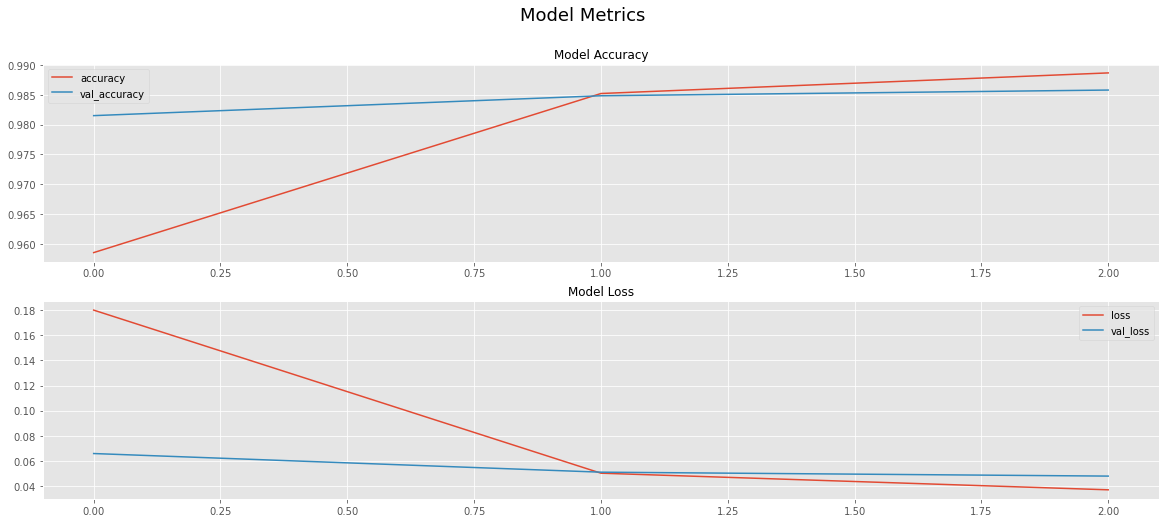

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(20, 8))
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot(ax=ax[0])
df[['loss', 'val_loss']].plot(ax=ax[1])
ax[0].set_title('Model Accuracy', fontsize=12)
ax[1].set_title('Model Loss', fontsize=12)
fig.suptitle('Model Metrics', fontsize=18);

In [34]:
x_list=[]
for key,value in word2idx.items():
  x_list.append(value)

while len(x_list)<50:
  x_list.append(num_words-1)

x_list=np.array(x_list)

x_list


array([    1,     2,     9,     4,     5,     6,     7,     8,    10,
          11,    12,    13,    14, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178, 35178,
       35178, 35178, 35178, 35178, 35178])

In [35]:
p = model.predict(np.array([x_list]))
p = np.argmax(p, axis=-1)
p

# 'Charls lives in London. He can speak fluent English'

array([[10, 10, 10, 10,  8, 10,  8, 10, 10, 10, 10,  8,  4, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10]])

In [36]:
tag2idx

{'B-gpe': 0,
 'I-gpe': 1,
 'B-eve': 2,
 'I-geo': 3,
 'I-per': 4,
 'B-geo': 5,
 'I-eve': 6,
 'B-tim': 7,
 'B-per': 8,
 'B-org': 9,
 'O': 10,
 'I-nat': 11,
 'B-art': 12,
 'I-org': 13,
 'B-nat': 14,
 'I-tim': 15,
 'I-art': 16}

In [37]:
entity_dict={}

for key,value in tag2idx.items():
  entity_dict[value]=key

entities=[]

for i in p[0]:
  entities.append(entity_dict[i])

entities




['O',
 'O',
 'O',
 'O',
 'B-per',
 'O',
 'B-per',
 'O',
 'O',
 'O',
 'O',
 'B-per',
 'I-per',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']